## Regressão Linear

O objetivo deste notebook é introduzir o conceito de regressão linear e apresentar um breve exemplo de como aplicar regressão linear em R com o dataset iris.

### 1- Introdução

Na regressão linear queremos compreender o **relacionamento** entre variáveis e descrevê-lo por meio de uma função linear.
Recordamos que:

- $Y$:  Variável dependente;
- $X$:  Variável independente;
- $\hat{Y}$:  Valor estimado de $Y$;
- $\epsilon = Y-\hat{Y}$:  Erro (resíduo)



Na regressão linear simples, temos apenas uma variável independente. Nesse caso, buscamos encontrar uma reta que melhor aproxime o conjunto de dados. Veja essa representação na figura abaixo.

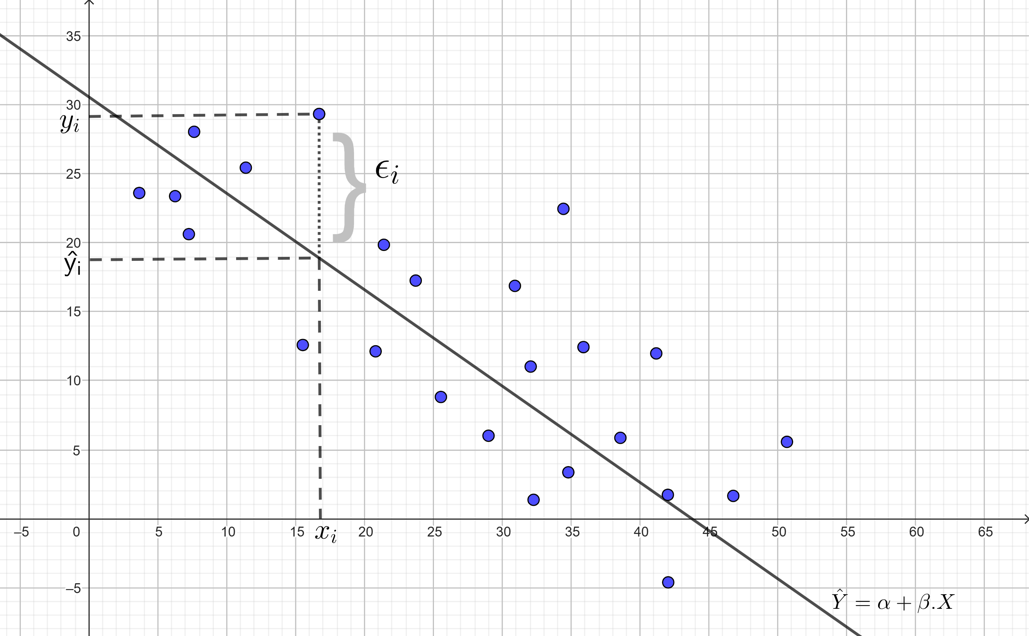

Temos:

- $\boxed{\hat{Y} = \alpha + \beta.X} $
- $\boxed{Y = \alpha + \beta.X + \epsilon} $

$$
\begin{cases}
y_1 = \alpha + \beta.x_1 + \epsilon_1 \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \\
y_i = \alpha + \beta.x_i + \epsilon_i \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \\
y_n = \alpha + \beta.x_n + \epsilon_n
\end{cases}
$$

### 2- Método dos mínimos quadrados

Para determinar a reta que melhor descreve o conjunto de dados é necessário determinar o valor para o par $(\alpha, \beta)$ de modo que o erro seja o menor possível.

Vamos minimizar a soma dos quadrados dos erros (**método de mínimos quadrados**).

$$ min(\epsilon_1^{2} + \epsilon_2^{2} + \cdots + \epsilon_n^{2})  = min\left(\sum\limits_{i=1}^n \epsilon_i^{2}\right) = min\left(\sum\limits_{i=1}^n (y_i - \hat{y_i})^{2}\right) = min\left(\sum\limits_{i=1}^n (y_i - \alpha - \beta.x_i)^{2}\right)$$

Note que $f(\alpha, \beta) = \sum\limits_{i=1}^n (y_i - \alpha - \beta.x_i)^{2}$ é uma função de duas variáveis. Os pontos candidatos para minimizar a função são aqueles que anulam as derividas parciais $\frac{\partial f}{\partial \alpha}$ e $\frac{\partial f}{\partial \beta}$.

---

$$ \frac{d \left(\sum\limits_{i=1}^n(y_i - \alpha - \beta . x_i)^{2}\right)}{d \alpha} = 0 \ \ \ \Leftrightarrow \ \ \ \sum\limits_{i=1}^n -2.(y_i - \alpha - \beta.x_i) = 0 \ \ \ \Leftrightarrow \ \ \ \sum\limits_{i=1}^n y_i - \sum\limits_{i=1}^n \alpha - \beta. \sum\limits_{i=1}^n x_i = 0 \ \ \ \Leftrightarrow \ \ \ \frac{\sum\limits_{i=1}^n y_i}{n} - \frac{n.\alpha}{n} - \beta. \frac{\sum\limits_{i=1}^n x_i}{n} = 0 \ \ \ \Leftrightarrow \ \ \ \alpha = \overline{Y} - \beta.\overline{X}$$

$ \therefore \ \ \boxed{\hat{\alpha} = \overline{Y} - \beta.\overline{X}}\ \ $ ( valor estimado de $\alpha$ )

---

$$\frac{d \left(\sum\limits_{i=1}^n (y_i - \alpha - \beta.x_i)^2 \right)}{d \beta} = 0 \ \ \ \Leftrightarrow \ \ \ \sum\limits_{i=1}^n 2.(y_i - \alpha - \beta.x_i).(-x_i) = 0 \ \ \ \Leftrightarrow \ \ \ -2. \sum\limits_{i=1}^n x_iy_i + 2.\alpha.\sum\limits_{i=1}^n x_i + 2.\beta.\sum\limits_{i=1}^n x_i^{2} = 0 \ \ \ \Leftrightarrow \ \ \ \beta.\sum\limits_{i=1}^n x_i^{2} = \sum\limits_{i=1}^n x_iy_i - \alpha.\sum\limits_{i=1}^n x_i \\ \ \ \ \Leftrightarrow \ \ \ \beta = \frac{\sum\limits_{i=1}^n x_iy_i - \alpha . \sum\limits_{i=1}^n x_i}{\sum\limits_{i=1}^n x_i^2}$$

Como $\alpha = \overline{Y} - \beta.\overline{X}$, segue

$$\beta.\sum\limits_{i=1}^n x_i^2 = \sum\limits_{i=1}^n x_iy_i - (\overline{Y} - \beta.\overline{X}). \sum\limits_{i=1}^n x_i \ \ \ \Leftrightarrow \ \ \ \beta.\sum\limits_{i=1}^n x_i^2 = \sum\limits_{i=1}^n x_iy_i - \overline{Y}.\sum\limits_{i=1}^n x_i + n.\beta.\overline{X}^2 \ \ \ \Leftrightarrow \ \ \ \beta.\left(\sum\limits_{i=1}^n x_i^2 - n.\overline{X}^2\right) = \sum\limits_{i=1}^n x_iy_i - n.\overline{X}.\overline{Y} \ \ \ \Leftrightarrow \ \ \ \beta = \frac{\sum\limits_{i=1}^n x_iy_i - n.\overline{X}.\overline{Y}}{\sum\limits_{i=1}^n x_i^2 - n.\overline{X}^2}$$

$ \therefore \ \ \boxed{\hat{\beta} = \frac{\sum\limits_{i=1}^n x_iy_i - n.\overline{X}.\overline{Y}}{\sum\limits_{i=1}^n x_i^2 - n.\overline{X}^2}} \ \ $ ( valor estimado de $\beta$ )

---

**Obs:**

**(1)** De acordo com o valor encontrado acima, é fácil mostrar que:
$$ \hat{\beta} = \frac{\sum\limits_{i=1}^n (y_i - \overline{Y}).(x_i - \overline{X})}{\sum\limits_{i=1}^n (x_i - \overline{X})^2 }$$

**(2)** A soma dos resíduos é zero:

$$ \sum\limits_{i=1}^n \epsilon_i = \sum\limits_{i=1}^n y_i - \hat{y}_i = \sum\limits_{i=1}^n y_i - \alpha - \beta.x_i = \sum\limits_{i=1}^n (y_i - \overline{Y} + \beta.\overline{X} - \beta.x_i) = \sum\limits_{i=1}^n y_i - n.\overline{Y} + n.\beta.\overline{X} - \beta.\sum\limits_{i=1}^n x_i = \cancel{\sum\limits_{i=1}^n y_i} - \cancel{\sum\limits_{i=1}^n y_i} + \bcancel{\beta.\sum\limits_{i=1}^n x_i} - \bcancel{\beta.\sum\limits_{i=1}^n x_i} = 0$$

**(3)** Do item anterior, segue que $ \sum\limits_{i=1}^n y_i = \sum\limits_{i=1}^n \hat{y_i}$. Consequentemente, $media(Y) = media(\hat{Y})$. Dizemos que $\hat{Y}$ é um estimador que em média acerta.

### 3- Regressão linear múltipla

Na regressão linear múltipla temos $p$ variáveis independentes, $p>1$. O raciocínio segue análogo ao realizado acima para a regressão linear simples.

$$ \boxed{Y = \alpha + \beta_1.X_1 + \beta_2.X_2 + \cdots + \beta_p.X_p + \epsilon}$$

$$
\begin{cases}
y_1 = \alpha + \beta_1.x_{11} + \beta_2.x_{21} + \cdots + \beta_p.x_{p1} + \epsilon_1 \\
\ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \\
y_i = \alpha + \beta_1.x_{1i} + \beta_2.x_{2i} + \cdots + \beta_p.x_{pi} + \epsilon_i \\
\ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \\
y_n = \alpha + \beta_1.x_{1n} + \beta_2.x_{2n} + \cdots + \beta_p.x_{pn} + \epsilon_n
\end{cases}
$$

### 4- Métricas para avaliação

Algumas métricas para avaliação do modelo de regressão são:

- Raiz quadrada do erro quadrático médio (RMSE):

  $$ M_1 = \sqrt\frac{\sum\limits_{i=1}^n \epsilon_i^2}{n} = \sqrt\frac{\sum\limits_{i=1}^n (y_i - \hat{y_i})^2}{n}$$

- Erro padrão residual (RSE):

  $$ M_2 = \sqrt\frac{\sum\limits_{i=1}^n \epsilon_i^2}{n-p-1} = \sqrt\frac{\sum\limits_{i=1}^n (y_i - \hat{y_i})^2}{n-p-1} $$

  $$ \text{(no denominador temos os graus de liberdade)} $$

### 5- Regressão Linear no R

Nesse tópico faremos uma breve análise de regressão linear em R com o dataset iris.

#### 5-1 Dados de entrada

In [1]:
# Importação da biblioteca ggplot2
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# Visualiza as 10 primeiras linhas do dataset iris
head(iris, 10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [3]:
# Schema de iris
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
# Resumo do dataset
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

#### 5.2- Gráfico de dispersão

Vamos investigar a relação entre **Petal.Length** e **Sepal.Length**. A ideia é encontrar uma função linear que possa explicar a variável Sepal.Length (variável dependente Y) em função de Petal.Length (variável independente X).

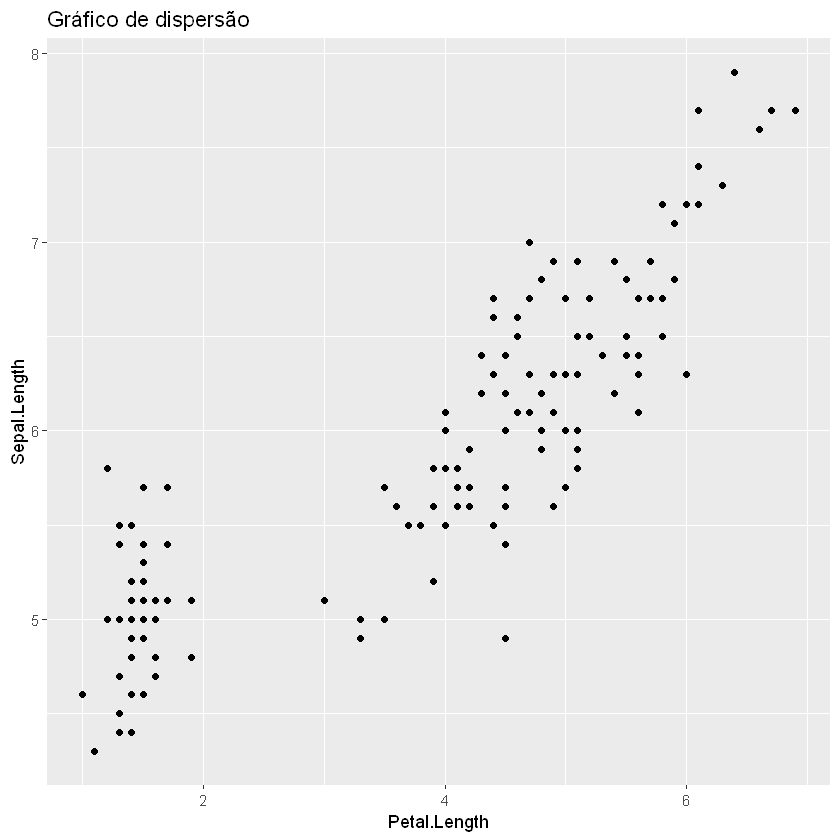

In [5]:
# Grafico de dispersão
ggplot(iris, aes(x=Petal.Length, y=Sepal.Length)) + ggtitle("Gráfico de dispersão") + geom_point()

#### 5-3 Modelo de regressão linear

Abaixo criamos um objeto 'model' chamando a função de regressão linear em R.

In [6]:
# model <- lm(y ~ x, data= ...)
model <- lm(Sepal.Length ~ Petal.Length, data=iris)

In [7]:
# Resumo das principais métricas do modelo
summary(model)


Call:
lm(formula = Sepal.Length ~ Petal.Length, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24675 -0.29657 -0.01515  0.27676  1.00269 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.30660    0.07839   54.94   <2e-16 ***
Petal.Length  0.40892    0.01889   21.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4071 on 148 degrees of freedom
Multiple R-squared:   0.76,	Adjusted R-squared:  0.7583 
F-statistic: 468.6 on 1 and 148 DF,  p-value: < 2.2e-16


In [8]:
# Valor previsto
fitted <- predict(model, newdata = iris)

head(fitted, 10)

1        2        3        4        5        6        7        8 
4.879095 4.879095 4.838202 4.919987 4.879095 5.001771 4.879095 4.919987 
       9       10 
4.879095 4.919987

In [9]:
# Resíduo
resid <- residuals(model)

head(resid, 10)

1           2           3           4           5           6 
 0.22090540  0.02090540 -0.13820238 -0.31998683  0.12090540  0.39822871 
          7           8           9          10 
-0.27909460  0.08001317 -0.47909460 -0.01998683

#### 5-4 Boxplot para comparar $Y$ e $\hat{Y}$

O boxplot é uma forma de visualizar as medidas descritivas: mínimo, 1º quartil, mediana, média, 3º quartil e máximo. Se existirem outliers, estes também serão apresentados.

In [10]:
# Valores reais (Y)
summary(iris$Sepal.Length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 

In [11]:
# Valores previstos (Y estimado)
summary(fitted)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.716   4.961   6.085   5.843   6.392   7.128 

Note que $\text{media}(Y) = \text{media}(\hat{Y})$, conforme já sabíamos

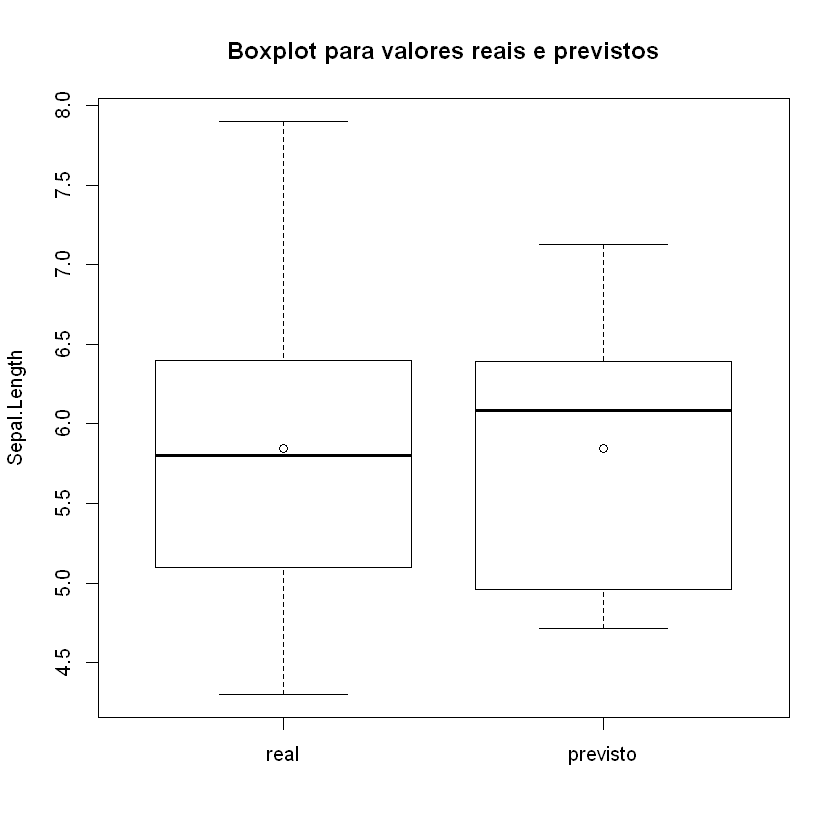

In [12]:
boxplot(iris$Sepal.Length, fitted, names = c("real", "previsto"), main = "Boxplot para valores reais e previstos", ylab = "Sepal.Length") 
points(c(mean(iris$Sepal.Length), mean(fitted)))

#### 5-5 Visualiza o resultado do modelo

Abaixo, a reta azul é a função de regressão linear. É a reta que contém os valores previstos: $\hat{Y} = \alpha + \beta.X = 4.31 + 0.41.X$

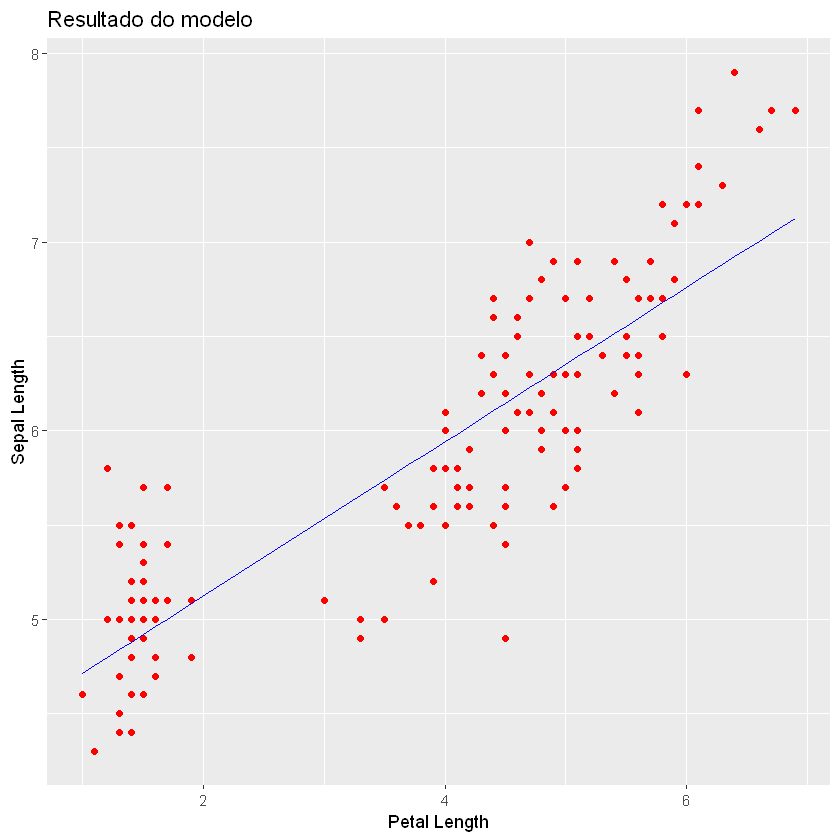

In [13]:
ggplot() + geom_point(aes(x = iris$Petal.Length, 
                          y = iris$Sepal.Length), colour = 'red') +
  geom_line(aes(x = iris$Petal.Length,
                y = predict(model, newdata = iris)), colour = 'blue') +
ggtitle("Resultado do modelo") + labs(x = "Petal Length", y = "Sepal Length")

#### 5-6 Visualiza a dispersão dos erros

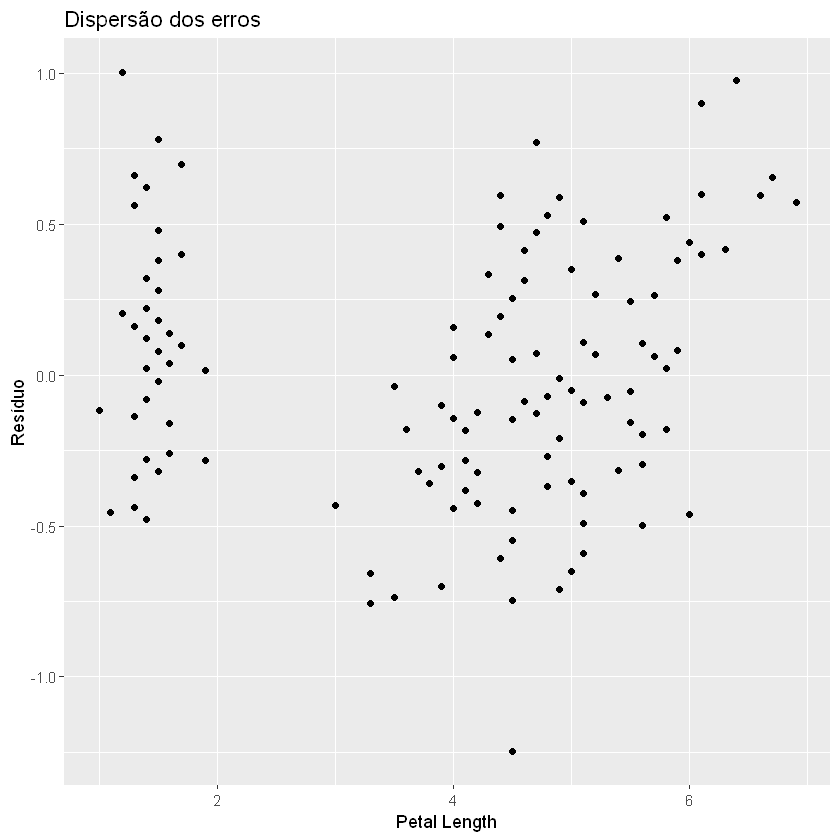

In [14]:
ggplot() + geom_point(aes(x=iris$Petal.Length, y=resid)) + ggtitle("Dispersão dos erros") + labs(x = "Petal Length", y = "Resíduo")

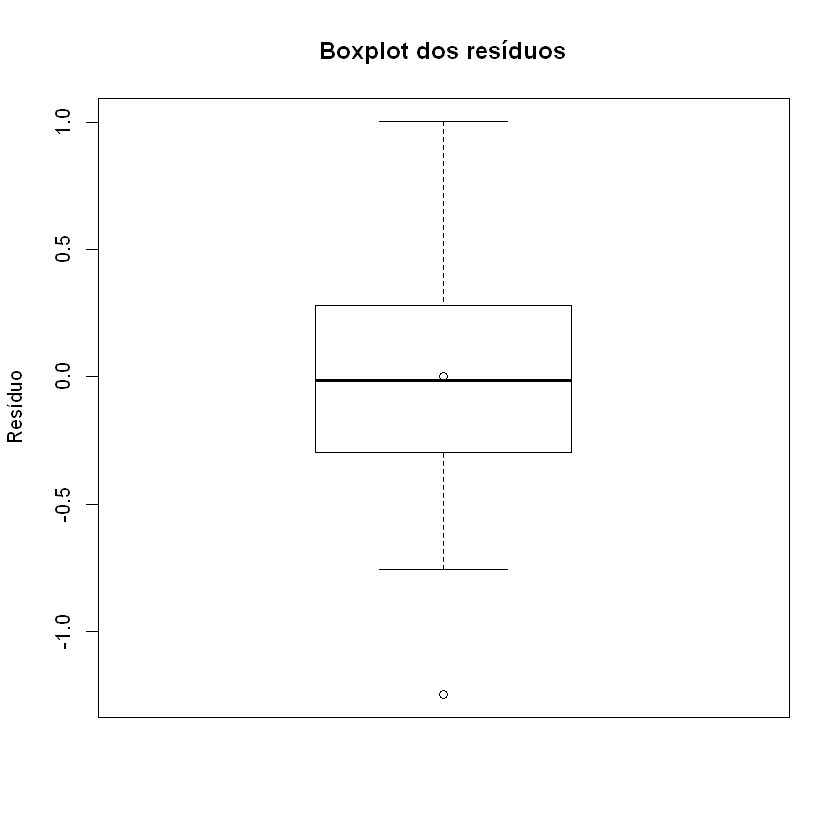

In [15]:
boxplot(resid, main = "Boxplot dos resíduos", ylab = "Resíduo")
points(c(mean(resid)))

In [16]:
# Resumo do vetor de resíduos (note que a média é zero, conforme já demonstramos)
summary(resid)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.24675 -0.29657 -0.01515  0.00000  0.27676  1.00269 

#### 5-7 Cálculo manual

É possível calcular todas as métricas, coeficientes ( $\alpha, \beta$ ) e obter a função de regressão linear utilizando apenas a definição e teoria apresentada no início deste notebook.

In [17]:
x <- iris$Petal.Length
y <- iris$Sepal.Length

Beta <- (sum(x*y) - 150*mean(x)*mean(y))/(sum(x*x) - 150*mean(x)*mean(x))
alfa <- mean(y) - Beta*mean(x)

y_hat <- alfa + Beta*x
rse <- sqrt((sum((y-y_hat)^2))/(148))

In [18]:
alfa

[1] 4.306603

In [19]:
Beta

[1] 0.4089223

In [20]:
# Erro padrão residual
rse

[1] 0.4070745

- Note que os valores calculados manualmente acima coincidem com o resultado abaixo

In [21]:
summary(model)


Call:
lm(formula = Sepal.Length ~ Petal.Length, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24675 -0.29657 -0.01515  0.27676  1.00269 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.30660    0.07839   54.94   <2e-16 ***
Petal.Length  0.40892    0.01889   21.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4071 on 148 degrees of freedom
Multiple R-squared:   0.76,	Adjusted R-squared:  0.7583 
F-statistic: 468.6 on 1 and 148 DF,  p-value: < 2.2e-16
